# IMF GDP

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WEOApr2019all.csv')

In [3]:
df.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,493.073,506.215,517.858,533.394,552.063,574.127,599.933,629.88,664.452,2017.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,2.164,2.665,2.3,3,3.5,3.997,4.495,4.992,5.489,2017.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,318.48","1,377.54","1,418.13","1,488.86","1,595.05","1,733.54","1,902.11","2,096.95","2,322.65",2017.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,19.428,20.235,19.585,19.99,20.682,21.928,23.577,25.45,27.608,2017.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,66.384,69.449,72.648,76.158,80.47,85.426,91.113,97.643,105.158,2017.0


In [4]:
df.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024', 'Estimates Start After'],
      dtype='object')

In [5]:
df['Subject Descriptor'].unique()

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product, deflator',
       'Gross domestic product per capita, constant prices',
       'Gross domestic product per capita, current prices',
       'Output gap in percent of potential GDP',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
       'Implied PPP conversion rate', 'Total investment',
       'Gross national savings', 'Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Six-month London interbank offered rate (LIBOR)',
       'Volume of imports of goods and services',
       'Volume of Imports of goods',
       'Volume of exports of goods and services',
       'Volume of exports of goods', 'Unemployment rate', 'Employment',
       'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',

In [6]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Gui

In [7]:
df_inflation = df[['Country', 'Subject Descriptor', 'Units', '2018']]

In [8]:
df_inflation[(df_inflation['Subject Descriptor'] == 'Inflation, average consumer prices')].reset_index(drop=True).head()

,Country,Subject Descriptor,Units,2018
0,Afghanistan,"Inflation, average consumer prices",Index,111.693
1,Afghanistan,"Inflation, average consumer prices",Percent change,0.626
2,Albania,"Inflation, average consumer prices",Index,105.39
3,Albania,"Inflation, average consumer prices",Percent change,2.029
4,Algeria,"Inflation, average consumer prices",Index,202.253


In [9]:
df_inflation = df_inflation[(df_inflation['Subject Descriptor'] == 'Inflation, average consumer prices') & (df_inflation['Units'] == 'Percent change')].reset_index(drop=True)

In [10]:
def to_float(x):
    if isinstance(x, str):
        if x == '--':
            return 0.0
        return float(x.replace(',', ''))

In [11]:
df_inflation['2018'] = df_inflation['2018'].apply(to_float)

In [12]:
df_inflation = df_inflation[(abs(df_inflation['2018']) < 100.0)]

In [13]:
df_inflation.head()

,Country,Subject Descriptor,Units,2018
0,Afghanistan,"Inflation, average consumer prices",Percent change,0.626
1,Albania,"Inflation, average consumer prices",Percent change,2.029
2,Algeria,"Inflation, average consumer prices",Percent change,4.270
3,Angola,"Inflation, average consumer prices",Percent change,19.629
4,Antigua and Barbuda,"Inflation, average consumer prices",Percent change,1.313


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
sns.set(style="whitegrid")

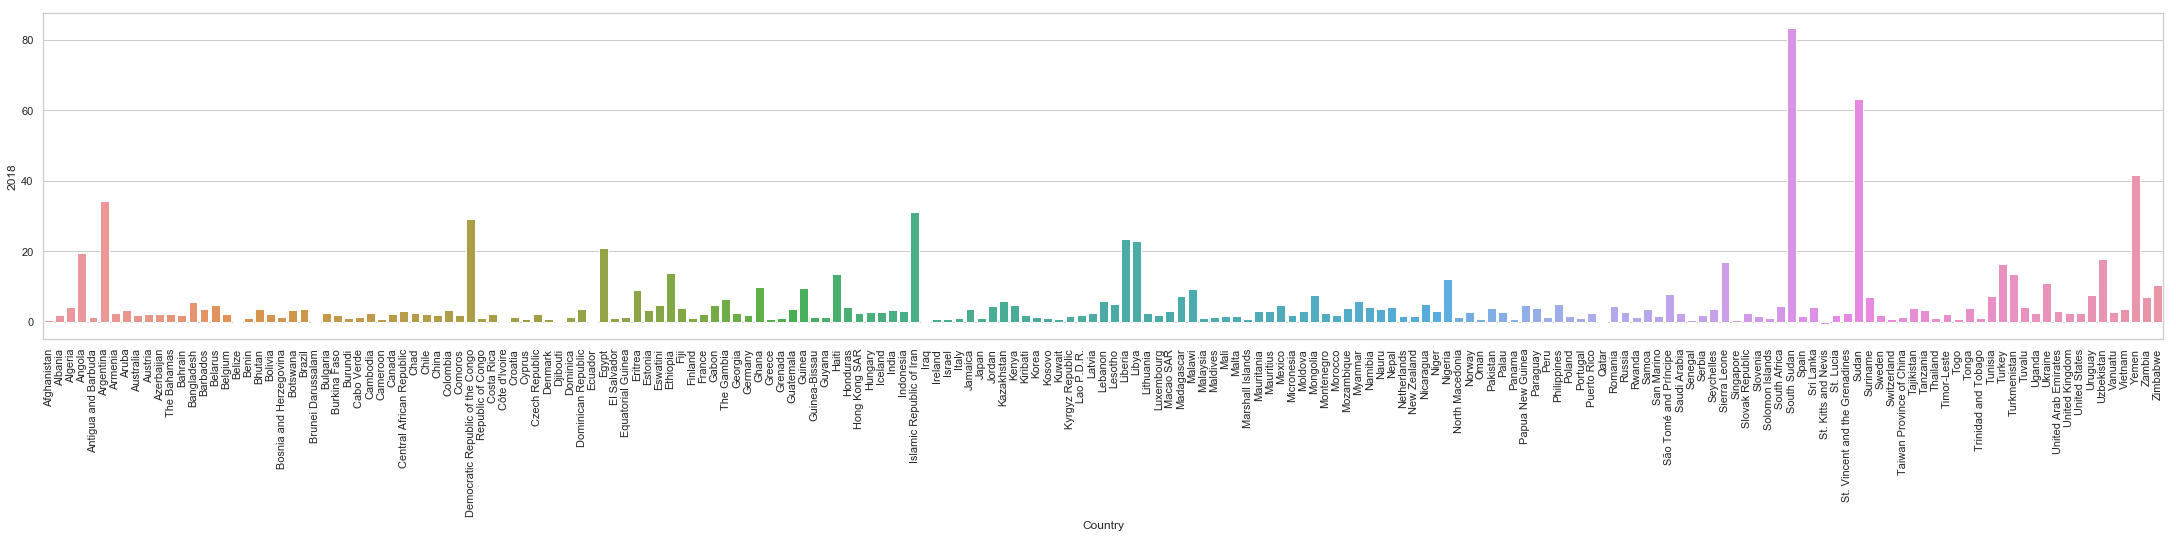

In [16]:
f, ax = plt.subplots(figsize=(38, 6));
plt.xticks(rotation=90)
ax = sns.barplot(x="Country", y="2018", data=df_inflation);